In [35]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
rawDF = pd.read_csv("apple_quality.csv")

rawDF.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [37]:
rawDF.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In this section, I'm looking for the minimum and maximum values within the dataset, in order to gauge the upper and lower limits of each category, and produce more usable data/predictions. The median should help me find the most neutral value relative to each category.

Size:

In [56]:
min_size = rawDF['Size'].min()
max_size = rawDF['Size'].max()

print(min_size)
print(max_size)

median = rawDF['Size'].median()

print(median)

-7.151703059
6.406366899
-0.5137025125000001


Weight:

In [57]:
min_weight = rawDF['Weight'].min()
max_weight = rawDF['Weight'].max()

print(min_weight)
print(max_weight)

median = rawDF['Weight'].median()

print(median)

-7.149847675
5.79071359
-0.9847364865


Sweetness:

In [59]:
min_sweetness = rawDF['Sweetness'].min()
max_sweetness = rawDF['Sweetness'].max()

print(min_sweetness)
print(max_sweetness)

median = rawDF['Sweetness'].median()

print(median)

-6.894485494
6.374915513
-0.5047584635


Crunchiness:

In [58]:
min_crunchiness = rawDF['Crunchiness'].min()
max_crunchiness = rawDF['Crunchiness'].max()

print(min_crunchiness)
print(max_crunchiness)

median = rawDF['Crunchiness'].median()

print(median)

-6.055057805
7.619851801
0.9982494390000001


Juiciness:

In [60]:
min_juiciness = rawDF['Juiciness'].min()
max_juiciness = rawDF['Juiciness'].max()

print(min_juiciness)
print(max_juiciness)

median = rawDF['Juiciness'].median()

print(median)

-5.961897048
7.364402864
0.5342186584999999


Ripeness:

In [61]:
min_ripeness = rawDF['Ripeness'].min()
max_ripeness = rawDF['Ripeness'].max()

print(min_ripeness)
print(max_ripeness)

median = rawDF['Ripeness'].median()

print(median)

-5.864598918
7.237836684
0.5034447135


Acidity:

In [62]:
min_acidity = rawDF['Acidity'].min()
max_acidity = rawDF['Acidity'].max()

print(min_acidity)
print(max_acidity)

median = rawDF['Acidity'].median()

print(median)

-7.010538475
7.404736238
0.022608968


Now that a scale of measures of different metrics has been relatively established, my next step is to find out if there is a correlation between some of the attributes of apples and their overall quality (good or bad) to see if i can find "the perfect apple".

<function matplotlib.pyplot.show(close=None, block=None)>

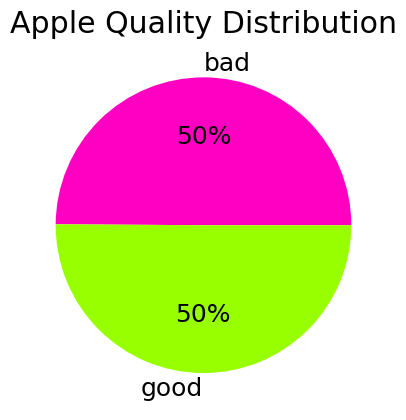

In [78]:
Quality = rawDF.groupby("Quality").size()

plt.title("Apple Quality Distribution")

plt.pie(Quality,
         labels=Quality.index,
         autopct= '%1.0f%%',
         colors = ["#FF00C2", "#98FF00"])

plt.show

There is a perfect 50/50 split of bad and good apples, which is good for visual purposes, but not very helpful in deeper analytical terms.

First, i'm going to find the percentage of apples that are good quality and small vs good quality and large. Then i'm going to do the same for every other apple attribute. These should help me find out if there is some correlation between several values.

Size

In [71]:
filtered_size_rawDF = rawDF[(rawDF['Size'] > -0.5137025125000001) & (rawDF['Quality'] == 'good')]

good_size = len(filtered_size_rawDF)

filtered_size2_rawDF = rawDF[(rawDF['Size'] > -0.5137025125000001) & (rawDF['Quality'] == 'bad')]

bad_size = len(filtered_size2_rawDF)

<function matplotlib.pyplot.show(close=None, block=None)>

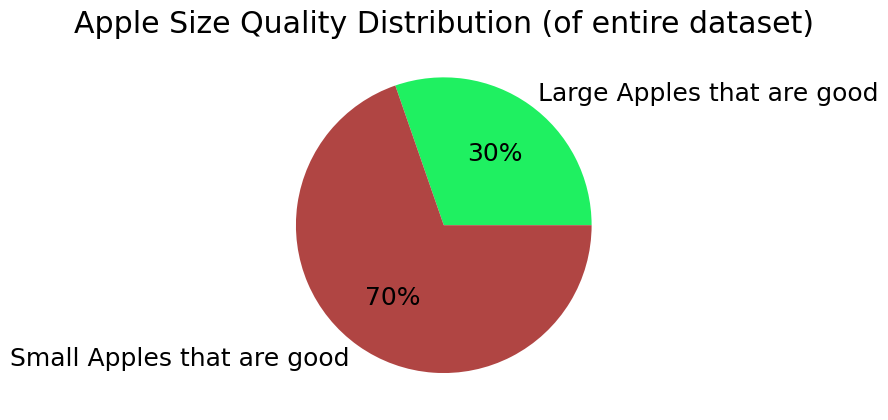

In [77]:
labels = ['Large Apples that are good', 'Small Apples that are good']
sizes = [good_size, len(rawDF) - good_size]

plt.title("Apple Size Quality Distribution (of entire dataset)")

plt.pie(sizes,
         labels=labels,
         autopct= '%1.0f%%',
         colors = ["#1FF061", "#B04543"])

plt.show

This chart shows that of all the good apples, 70% of them are small and 30% of them are large. 

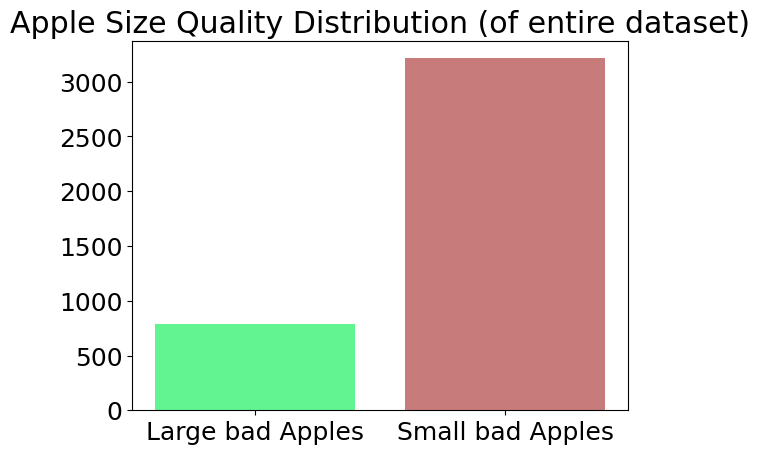

In [112]:
labels = ['Large bad Apples', 'Small bad Apples']
sizes2 = [bad_size, len(rawDF) - bad_size]

plt.title("Apple Size Quality Distribution (of entire dataset)")

plt.bar(labels, sizes2, color=["#1FF061", "#B04543"], alpha=0.7)

plt.show()

This chart shows that of all the bad apples, 80% (over 3000) of them are small and 20% (under 1000) of them are large. 

This tells us that while a majority of good apples are small, a majority of bad apples are also small. This means that there is a higher likelihood that a good apple will be large, or above the median.

Weight

In [86]:
filtered_weight_rawDF = rawDF[(rawDF['Weight'] > -0.9847364865) & (rawDF['Quality'] == 'good')]

good_weight = len(filtered_weight_rawDF)

filtered_weight2_rawDF = rawDF[(rawDF['Weight'] > -0.9847364865) & (rawDF['Quality'] == 'bad')]

bad_weight = len(filtered_weight2_rawDF)

<function matplotlib.pyplot.show(close=None, block=None)>

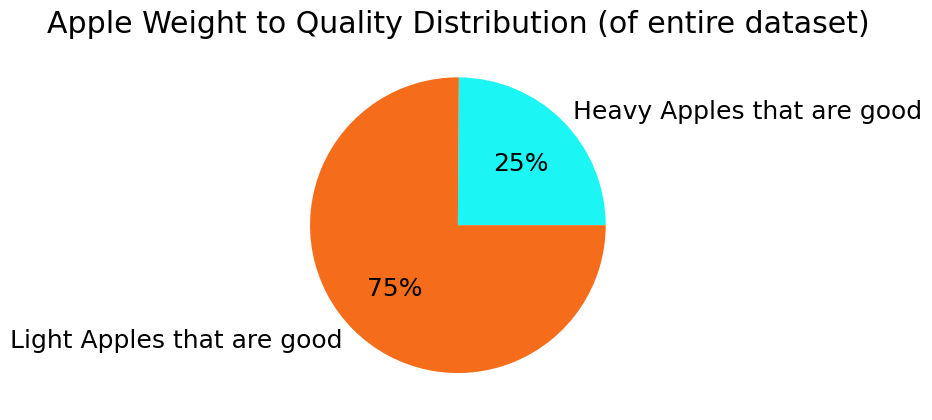

In [114]:
labels = ['Heavy Apples that are good', 'Light Apples that are good']
weights = [good_weight, len(rawDF) - good_weight]

plt.title("Apple Weight to Quality Distribution (of entire dataset)")

plt.pie(weights,
         labels=labels,
         autopct= '%1.0f%%',
         colors = ["#1BF5F4", "#F56C1B"])

plt.show

This shows that, of all the good apples, 75% of them are light while 25% of them are heavy.

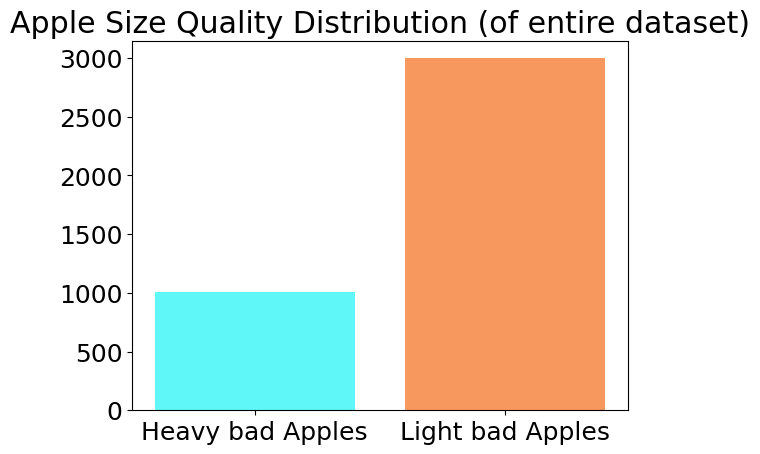

In [115]:
labels = ['Heavy bad Apples', 'Light bad Apples']
weights2 = [bad_weight, len(rawDF) - bad_weight]

plt.title("Apple Size Quality Distribution (of entire dataset)")

plt.bar(labels, weights2, color=["#1BF5F4", "#F56C1B"], alpha=0.7)

plt.show()


This shows that, of all the bad apples, 75% of them are light while 25% of them are heavy.

This leads me to believe that the majority of bad apples are light, and a majority of the good apples are light too. This means there's a higher likelihood of getting a good apple that is heavy.

Sweetness

In [89]:
filtered_sweet_rawDF = rawDF[(rawDF['Sweetness'] > -0.5047584635) & (rawDF['Quality'] == 'good')]

good_sweet = len(filtered_sweet_rawDF)

filtered_sweet2_rawDF = rawDF[(rawDF['Sweetness'] > -0.5047584635) & (rawDF['Quality'] == 'bad')]

bad_sweet = len(filtered_sweet2_rawDF)

<function matplotlib.pyplot.show(close=None, block=None)>

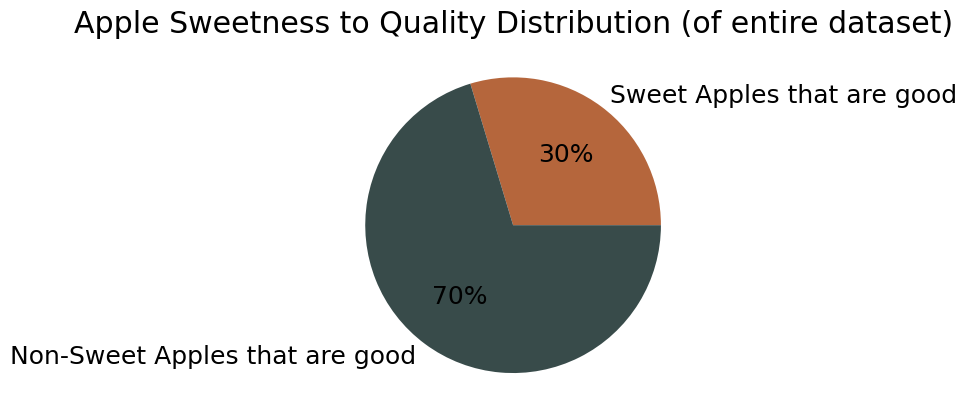

In [119]:
labels = ['Sweet Apples that are good', 'Non-Sweet Apples that are good']
sweets = [good_sweet, len(rawDF) - good_sweet]

plt.title("Apple Sweetness to Quality Distribution (of entire dataset)")

plt.pie(sweets,
         labels=labels,
         autopct= '%1.0f%%',
         colors = ["#B5663C", "#384B4A"])

plt.show

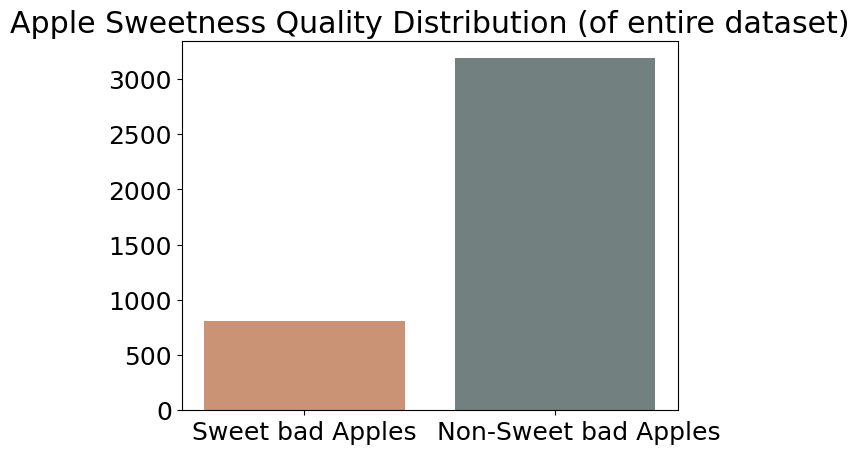

In [140]:
labels = ['Sweet bad Apples', '      Non-Sweet bad Apples']
sweets2 = [bad_sweet, len(rawDF) - bad_sweet]

plt.title("Apple Sweetness Quality Distribution (of entire dataset)")

plt.bar(labels, sweets2, color=["#B5663C", "#384B4A"], alpha=0.7)

plt.show()

This shows again that while a majority of nonsweet apples are good, the majority of nonsweet apples are also bad. Sweet apples have a higher likelihood of being good.

Crunchiness

In [94]:
filtered_crunch_rawDF = rawDF[(rawDF['Crunchiness'] > 0.9982494390000001) & (rawDF['Quality'] == 'good')]

good_crunch = len(filtered_crunch_rawDF)

filtered_crunch2_rawDF = rawDF[(rawDF['Crunchiness'] > 0.9982494390000001) & (rawDF['Quality'] == 'bad')]

bad_crunch = len(filtered_crunch2_rawDF)

<function matplotlib.pyplot.show(close=None, block=None)>

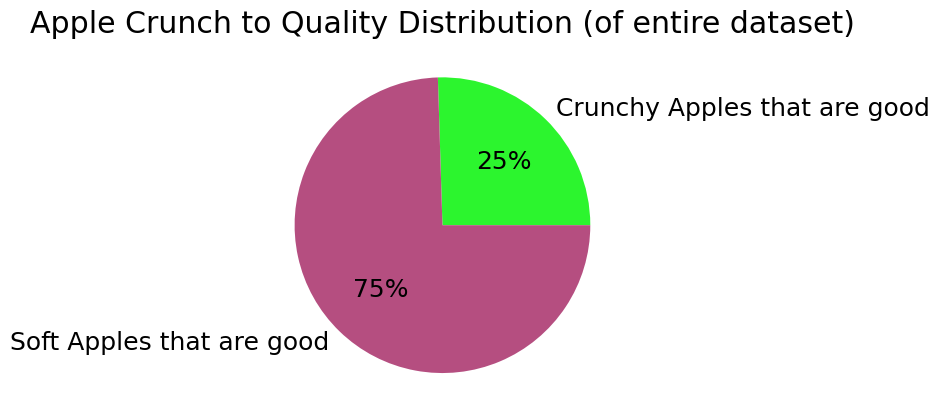

In [124]:
labels = ['Crunchy Apples that are good', 'Soft Apples that are good']
crunches = [good_crunch, len(rawDF) - good_crunch]

plt.title("Apple Crunch to Quality Distribution (of entire dataset)")

plt.pie(crunches,
         labels=labels,
         autopct= '%1.0f%%',
         colors = ["#2CF52E", "#B54E80"])

plt.show

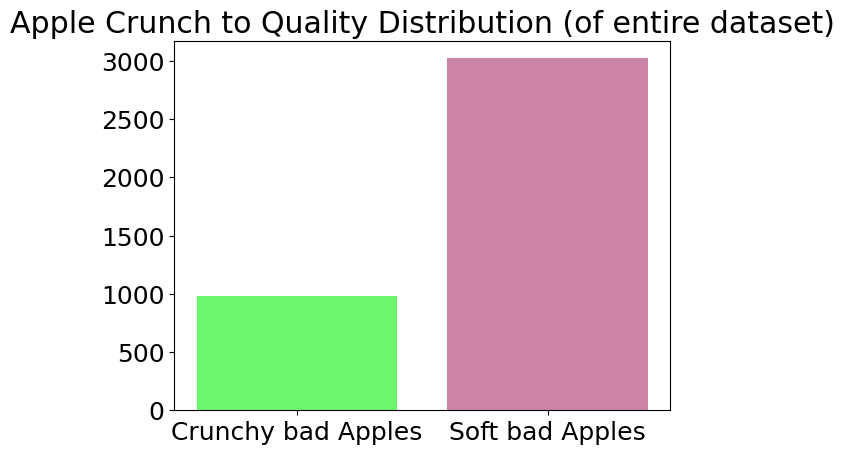

In [126]:
labels = ['Crunchy bad Apples', 'Soft bad Apples']
crunches2 = [bad_crunch, len(rawDF) - bad_crunch]

plt.title("Apple Crunch to Quality Distribution (of entire dataset)")

plt.bar(labels, crunches2, color=["#2CF52E", "#B54E80"], alpha=0.7)

plt.show()

This shows again that while a majority of soft apples are good, the same can be said about the bad. Therefore it is more likely to get a good apple when it is crunchy

Juiciness

In [97]:
filtered_juice_rawDF = rawDF[(rawDF['Juiciness'] > 0.5342186584999999) & (rawDF['Quality'] == 'good')]

good_juice = len(filtered_juice_rawDF)

filtered_juice2_rawDF = rawDF[(rawDF['Juiciness'] > 0.5342186584999999) & (rawDF['Quality'] == 'bad')]

bad_juice = len(filtered_juice2_rawDF)


<function matplotlib.pyplot.show(close=None, block=None)>

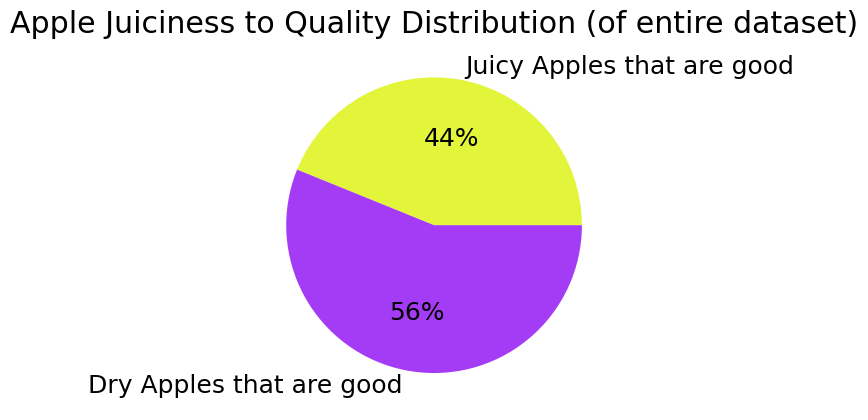

In [129]:
labels = ['Juicy Apples that are good', 'Dry Apples that are good']
juices = [good_juice, len(rawDF) - good_juice]

plt.title("Apple Juiciness to Quality Distribution (of entire dataset)")

plt.pie(juices,
         labels=labels,
         autopct= '%1.0f%%',
         colors = ["#E3F53B", "#A53CF5"])

plt.show

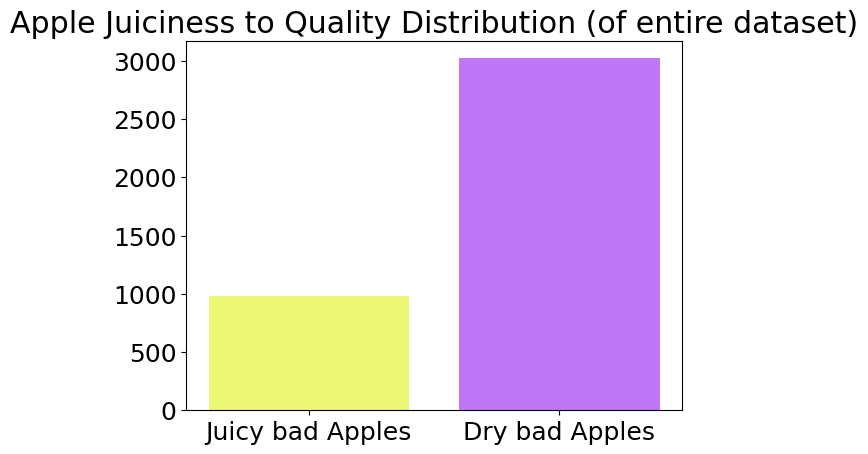

In [130]:
labels = ['Juicy bad Apples', 'Dry bad Apples']
juices2 = [bad_juice, len(rawDF) - bad_juice]

plt.title("Apple Juiciness to Quality Distribution (of entire dataset)")

plt.bar(labels, crunches2, color=["#E3F53B", "#A53CF5"], alpha=0.7)

plt.show()

These graphs show again that while a higher percentage of dry apples are considered good, the same can be said about dry apples that are considered bad. Therefore juicy apples are more likely to be better in quality.

Ripeness

In [100]:
filtered_ripe_rawDF = rawDF[(rawDF['Ripeness'] > 0.5034447135) & (rawDF['Quality'] == 'good')]

good_ripe = len(filtered_ripe_rawDF)

filtered_ripe2_rawDF = rawDF[(rawDF['Ripeness'] > 0.5034447135) & (rawDF['Quality'] == 'bad')]

bad_ripe = len(filtered_ripe2_rawDF)

<function matplotlib.pyplot.show(close=None, block=None)>

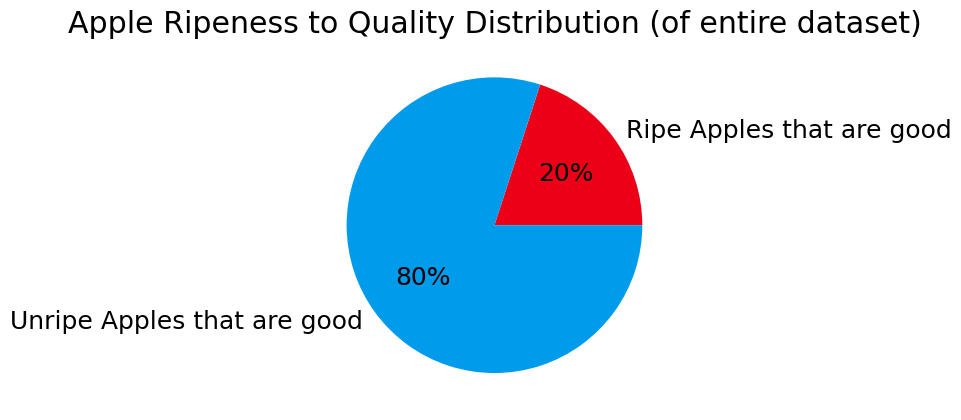

In [134]:
labels = ['Ripe Apples that are good', 'Unripe Apples that are good']
ripes = [good_ripe, len(rawDF) - good_ripe]

plt.title("Apple Ripeness to Quality Distribution (of entire dataset)")

plt.pie(ripes,
         labels=labels,
         autopct= '%1.0f%%',
         colors = ["#EB0017", "#009CEB"])

plt.show

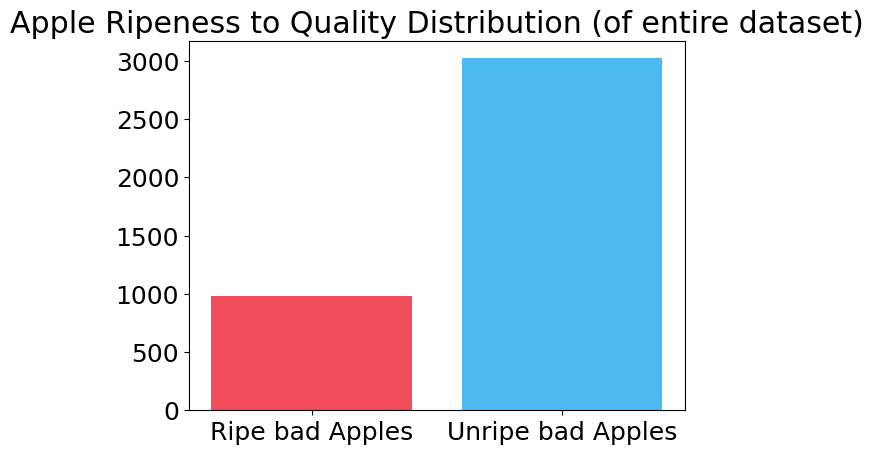

In [139]:
labels = ['Ripe bad Apples', 'Unripe bad Apples']
ripes2 = [bad_ripe, len(rawDF) - bad_ripe]

plt.title("Apple Ripeness to Quality Distribution (of entire dataset)")

plt.bar(labels, crunches2, color=["#EB0017", "#009CEB"], alpha=0.7)

plt.show()

The majority of unripe apples in the dataset are bad and good, therefore getting a ripe apple that is good is more likely.

Acidity

In [103]:
filtered_acid_rawDF = rawDF[(rawDF['Acidity'] > 0.022608968) & (rawDF['Quality'] == 'good')]

good_acid = len(filtered_acid_rawDF)

filtered_acid2_rawDF = rawDF[(rawDF['Acidity'] > 0.022608968) & (rawDF['Quality'] == 'bad')]

bad_acid = len(filtered_acid2_rawDF)

<function matplotlib.pyplot.show(close=None, block=None)>

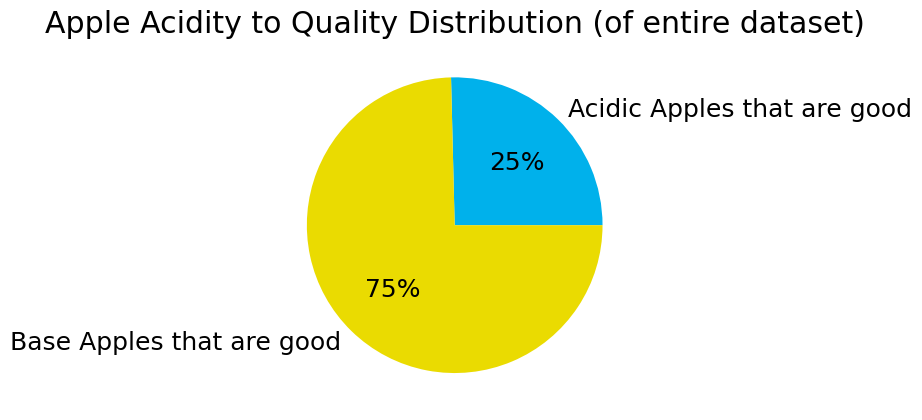

In [138]:
labels = ['Acidic Apples that are good', 'Base Apples that are good']
acids = [good_acid, len(rawDF) - good_acid]

plt.title("Apple Acidity to Quality Distribution (of entire dataset)")

plt.pie(acids,
         labels=labels,
         autopct= '%1.0f%%',
         colors = ["#00B1EB", "#EADB01"])

plt.show


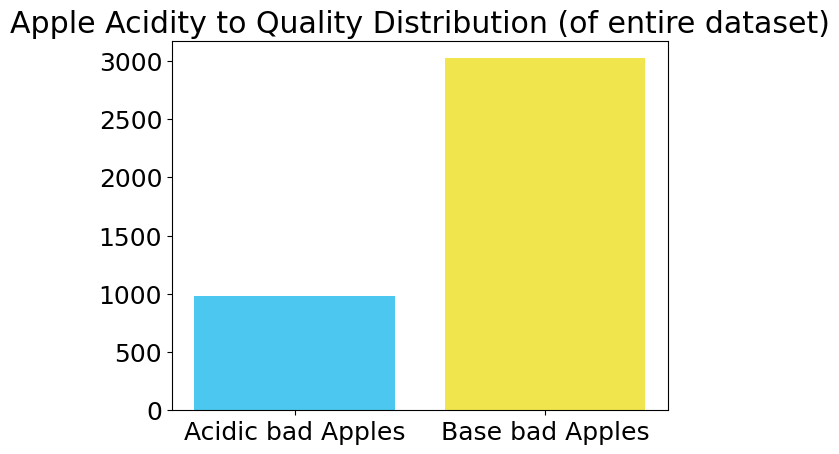

In [137]:

labels = ['Acidic bad Apples', 'Base bad Apples']
acids2 = [bad_acid, len(rawDF) - bad_acid]

plt.title("Apple Acidity to Quality Distribution (of entire dataset)")

plt.bar(labels, crunches2, color=["#00B1EB", "#EADB01"], alpha=0.7)

plt.show()

This shows that while the majority of good apples are base, the same can be said about bad apples. This leads us to make the assumption that Acidic apples will more likely be good.

All of these observations have lead me to believe that the 'perfect' apple would be an apple that is a large, heavy, sweet, crunchy, juicy, ripe, and acidic. Therefore i believe that our company should procure, produce, and sell more of this kind of apple for maximum customer satisfaction and profit increase.

<function matplotlib.pyplot.show(close=None, block=None)>

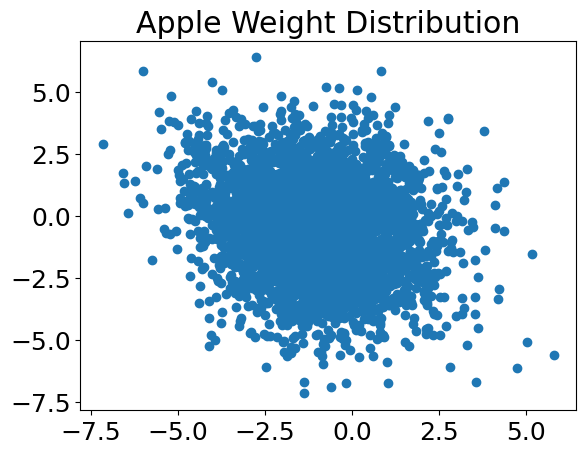

In [84]:
Weight = rawDF["Weight"]
Size = rawDF["Size"]

plt.rcParams["text.color"] = "black"
plt.rcParams["font.size"] = 18
plt.rcParams["figure.facecolor"] = "white"

plt.title("Apple Weight Distribution")

plt.scatter(x = Weight, y = Size)

plt.show